# Pryngles deprecated code

Here I will collect that code that becomes deprecated because external or internal modules evolve.

## Spangler module

In [2]:
#@external
from pryngles import *

#Aliases
sci=Science

import pandas as pd
import random

#Specialized plotting methods
from scipy.spatial import ConvexHull, convex_hull_plot_2d
from matplotlib.lines import Line2D
from matplotlib.collections import LineCollection
from matplotlib import animation
from celluloid import Camera # getting the camera
import itertools
from tqdm import tqdm
#@end:external

In [3]:
def _plot_qhulls(self):
    """Plot the convex hulls 
    """
    
    if not self.qhulls:
        raise AssertionError("You cannot plot convex hulls because none has been yet calculated.")
    
    fig,ax=plt.subplots()

    for name,sphull in self.qhulls.items():
        for qhull in sphull:
            chull=qhull["qhull"]
            if chull:
                f=convex_hull_plot_2d(chull,ax)
            
    #Remove points corresponding to qhull
    for l in fig.axes[0].get_children():
        if type(l) is Line2D:
            plt.setp(l,ms=0,zorder=100)

    ax.scatter(self.data.x_int,self.data.y_int,color='r',s=65,fc="None",alpha=0.5,zorder=100)        
    
    ax.set_xlabel(r"$x_{int}$")
    ax.set_ylabel(r"$y_{int}$")
    ax.grid()
    
    ax.axis("equal")
Spangler._plot_qhulls=_plot_qhulls 

  VERB1::set_intersect:: Setting intersect using nvec = [1, 0, 1], alpha = 0 center = [0, 0, -1], name = Ring
  VERB1::_calc_qhulls:: Hull points (hidden): 25
  VERB1::_calc_qhulls:: Hull points (visible ring): 50


<IPython.core.display.Javascript object>


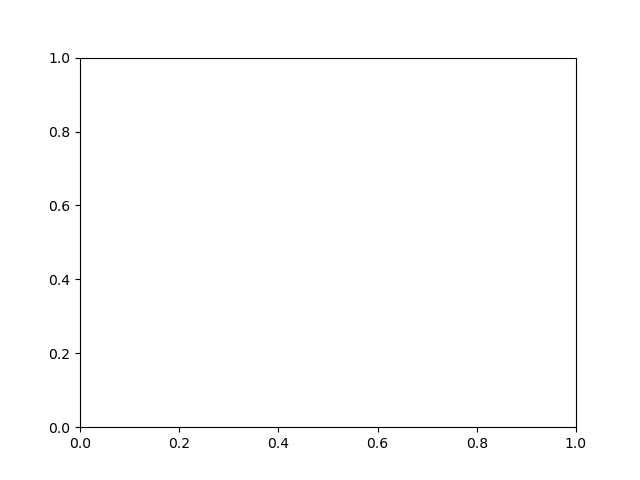

E
ERROR: test_setint (__main__.Test)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/tmp/ipykernel_36450/3997588582.py", line 18, in test_setint
    sg._plot_qhulls() #Deprecated
  File "/tmp/ipykernel_36450/3931083392.py", line 14, in _plot_qhulls
    f=convex_hull_plot_2d(chull,ax)
  File "<decorator-gen-9>", line 2, in convex_hull_plot_2d
TypeError: _held_figure() takes from 2 to 3 positional arguments but 4 were given

----------------------------------------------------------------------
Ran 1 test in 0.238s

FAILED (errors=1)


In [4]:
#@test:spangler
def test_setint(self):
    global sg

    Verbose.VERBOSITY=VERB_SIMPLE

    #No preset
    sg=Spangler(nspangles=50,name="Ring")
    sg.populate_spangler(shape="ring",seed=1,
                         spangle_type=SPANGLE_GRANULAR,
                         scale=2,ri=0.2)
    sg.data.illuminated=True
    sg.data.visible=True

    cond,n_int,d_int=sg.set_intersect(nvec=[1,0,1],center=[0,0,-1],
                                      name="Ring")
    sg._calc_qhulls()
    sg._plot_qhulls() #Deprecated

    Verbose.VERBOSITY=VERB_NONE

class Test(unittest.TestCase):pass
Test.test_setint=test_setint
unittest.main(argv=['first-arg-is-ignored'],exit=False)
#@end:test

  VERB1::__init__:: Loading sampler from preset: ('sphere', {})
  VERB1::purge_sample:: Already purged.
  VERB1::__init__:: Joining 2 spanglers
  VERB1::set_intersect:: Setting intersect using nvec = [1, 0, 0.1], alpha = 0 center = [1, 1, 1], name = None
  VERB1::_calc_qhulls:: Hull points (hidden): 25
  VERB1::_calc_qhulls:: Hull points (visible ring): 1000
  VERB1::_calc_qhulls:: Hull points (whole object): 987


<IPython.core.display.Javascript object>


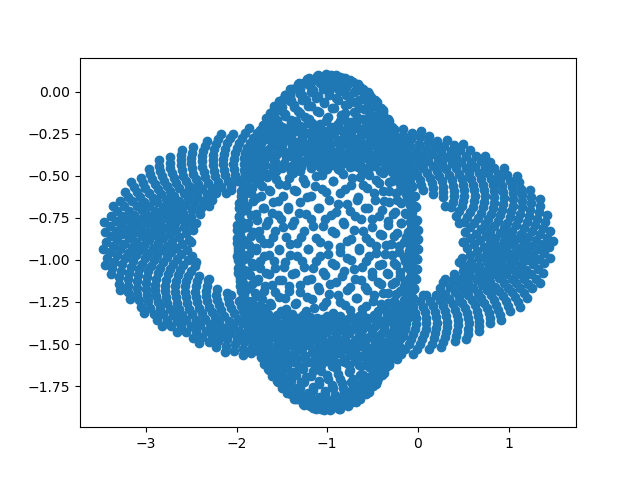

E
ERROR: test_hulls (__main__.Test)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/tmp/ipykernel_36450/539307132.py", line 18, in test_hulls
    f=convex_hull_plot_2d(sgj.qhulls["Planet"][0]["qhull"],ax) #Deprecated
  File "<decorator-gen-9>", line 2, in convex_hull_plot_2d
TypeError: _held_figure() takes from 2 to 3 positional arguments but 4 were given

----------------------------------------------------------------------
Ran 1 test in 0.604s

FAILED (errors=1)


In [6]:
#@test:spangler
def test_hulls(self):

    Verbose.VERBOSITY=VERB_SIMPLE

    sg1=Spangler(nspangles=1000,name="Ring",n_equ=[1,0,5])
    sg1.populate_spangler(shape="ring",spangle_type=SPANGLE_GRANULAR,scale=2.5,seed=1,ri=1.5/2.5,boundary=0)
    sg2=Spangler(nspangles=1000,name="Planet",n_equ=[0,0,1])
    sg2.populate_spangler(shape="sphere",spangle_type=SPANGLE_SOLID_ROCK,scale=1,seed=1,preset=True)
    sgj=Spangler(spanglers=[sg1,sg2])

    #Hulls of obsever
    cond,n_int,d_int=sgj.set_intersect(nvec=[1,0,0.1],center=[1,1,1]) #Each time a set intersect is executed the convex hulls are renewed
    sgj._calc_qhulls()

    fig,ax=plt.subplots()
    ax.scatter(sgj.data[cond].x_int,sgj.data[cond].y_int)
    f=convex_hull_plot_2d(sgj.qhulls["Planet"][0]["qhull"],ax) #Deprecated
    ax.axis("equal")

    f=convex_hull_plot_2d(sgj.qhulls["Ring"][0]["qhull"],ax) #Deprecated
    f=convex_hull_plot_2d(sgj.qhulls["Ring"][1]["qhull"],ax)

    #Hulls of light
    sgj.set_intersect([0,0,1]) #Each time a set intersect is executed the convex hulls are renewed
    sgj._calc_qhulls()
    fig,ax=plt.subplots()
    cond=sgj.data.visible
    ax.scatter(sgj.data[cond].x_int,sgj.data[cond].y_int)
    f=convex_hull_plot_2d(sgj.qhulls["Planet"][0]["qhull"],ax) #Deprecated
    f=convex_hull_plot_2d(sgj.qhulls["Ring"][0]["qhull"],ax) #Deprecated
    f=convex_hull_plot_2d(sgj.qhulls["Ring"][1]["qhull"],ax) #Deprecated
    ax.axis("equal")

    Verbose.VERBOSITY=VERB_NONE

class Test(unittest.TestCase):pass
Test.test_hulls=test_hulls
unittest.main(argv=['first-arg-is-ignored'],exit=False)
#@end:test